### In this task we will classify 28x28 images of handwritten digits using a CNN
---

In [48]:
import os
import cv2
import numpy as np
from keras.src.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [49]:
# Function for loading dataset
def load_dataset(path):
    encoder = LabelEncoder()
    labels = []
    images = []

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            labels.append(folder)
            img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_GRAYSCALE)
            images.append(img)

    images = np.array(images).reshape(-1, 28, 28, 1).astype(np.float32)
    labels = encoder.fit_transform(labels)
    return images, labels

In [50]:
# Load data
X_train, y_train = load_dataset(path="../MNIST-Hand-Drawn-Digits-Recognition-XGBOOST/data/train")
X_test, y_test = load_dataset(path="../MNIST-Hand-Drawn-Digits-Recognition-XGBOOST/data/test")

# Shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [51]:
# Build model
model = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Rescaling(1./255),

    # Block 1: 16 filters, 3×3 kernel
    keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 2: 32 filters, 3×3 kernel
    keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 3: 64 or 128 filters, 3×3 kernel
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(units=10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 7, 7, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 84)             │        90,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,346 (556.04 KB)

 Trainable params: 142,346 (556.04 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train model
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9130 - loss: 0.2728 - val_accuracy: 0.9734 - val_loss: 0.0885
Epoch 2/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9749 - loss: 0.0839 - val_accuracy: 0.9844 - val_loss: 0.0514
Epoch 3/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9816 - loss: 0.0617 - val_accuracy: 0.9849 - val_loss: 0.0490
Epoch 4/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9852 - loss: 0.0493 - val_accuracy: 0.9863 - val_loss: 0.0399
Epoch 5/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9865 - val_loss: 0.0445
Epoch 6/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9888 - val_loss: 0.0325
Epoch 7/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9881 - val_loss: 0.0386
Epoch 8/30
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.

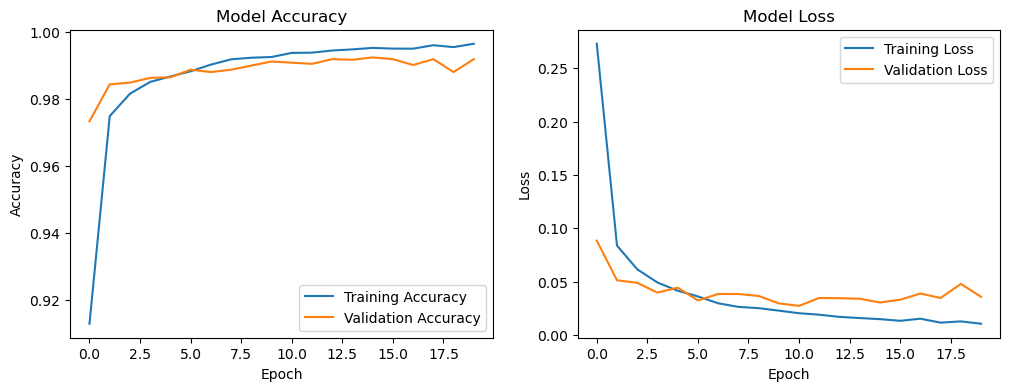

In [53]:
# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [54]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

y_prediction = model.predict(X_test)
y_prediction = np.argmax(y_prediction, axis=1)
result = confusion_matrix(y_test, y_prediction)
print("Confusion matrix:")
print(result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9931 - loss: 0.0261
Test accuracy: 0.99
Test loss: 0.03
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix:
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1132    1    1    0    0    0    1    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    0    2 1005    0    3    0    0    0    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    0    5    0  885    1    0    0    0]
 [   7    2    0    1    2    2  944    0    0    0]
 [   0    4    3    0    0    0    0 1017    1    3]
 [   1    0    2    2    1    1    0    1  963    3]
 [   0    1    0    0    5    2    0    2    0  999]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


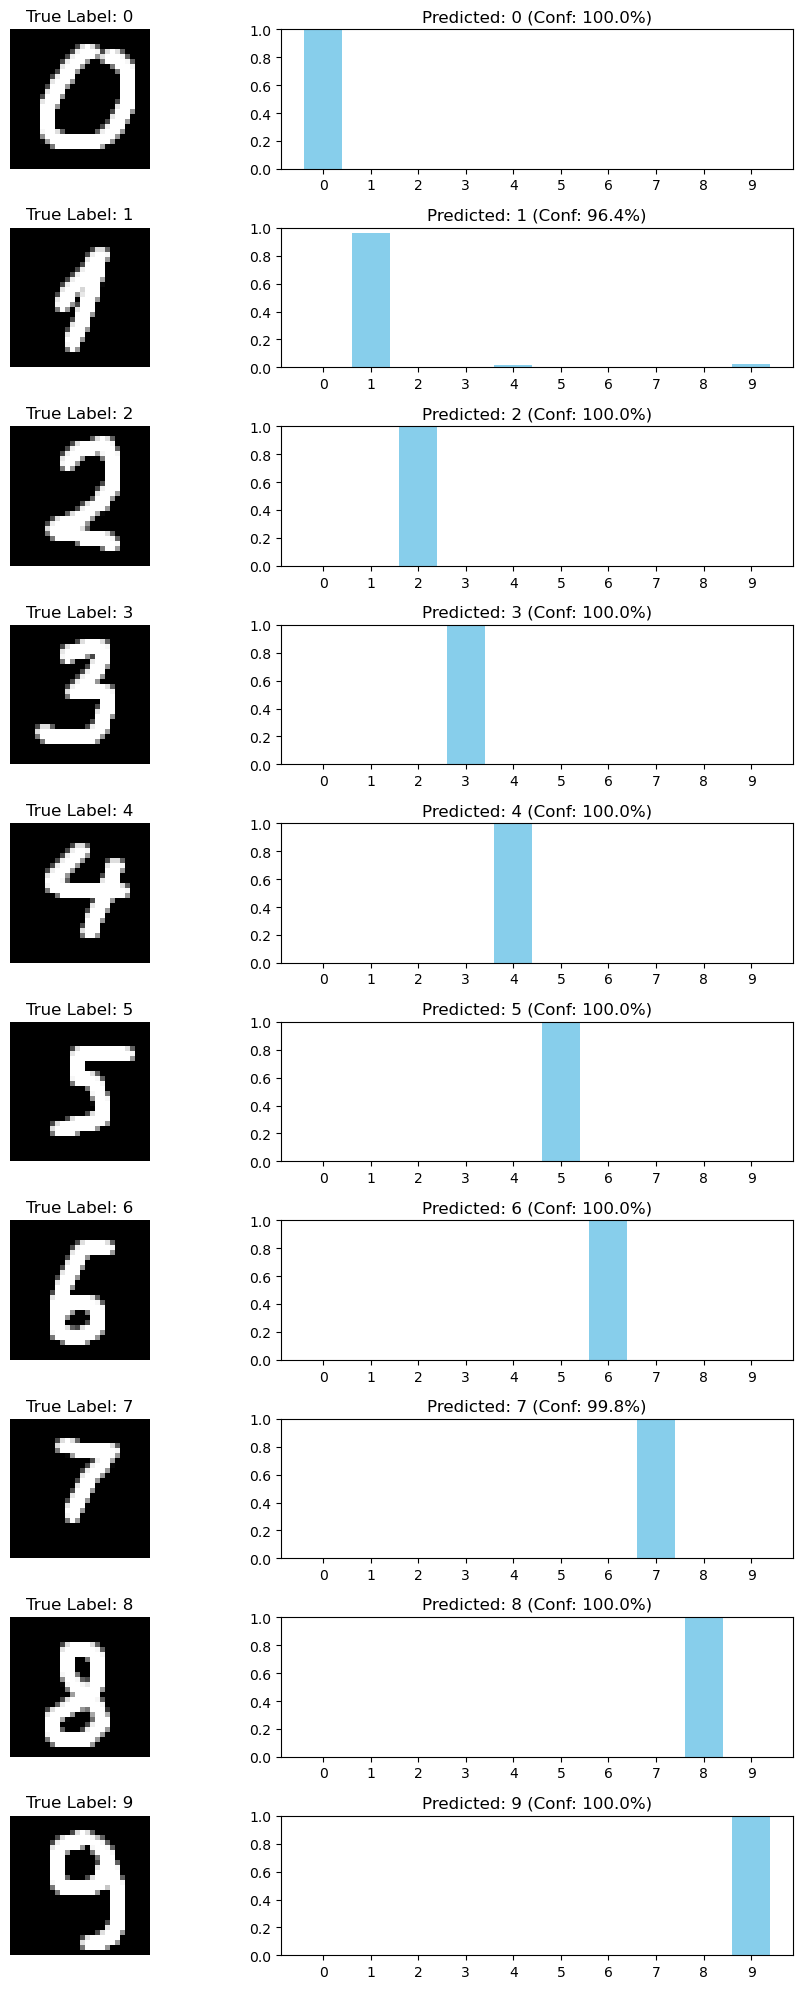

In [55]:
# See some example predictions
X, y = load_dataset("data/MyTestBatch")

y_pred = model.predict(X)

predicted_labels = np.argmax(y_pred, axis=1)
predicted_confidence = np.max(y_pred, axis=1)

fig, axes = plt.subplots(10, 2, figsize=(10, 2 * 10))

for i in range(10):
    # Image
    axes[i, 0].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[i, 0].set_title(f"True Label: {y[i]}")
    axes[i, 0].axis('off')

    # Probability distribution
    axes[i, 1].bar(range(10), y_pred[i], color='skyblue')
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_ylim(0, 1)
    axes[i, 1].set_title(f"Predicted: {predicted_labels[i]} (Conf: {predicted_confidence[i]*100:.1f}%)")

plt.tight_layout()
plt.show()

## Notes:
---
During this project I made the following observations:
1. Overall, this simple CNN performs substantially better than XGBoost (method used in the last notebook)
2. Even with a small model it performed very well achieving a tets accuracy of 99%
3. Shuffling train data is very important

### Note: Ignore this cell. This is to organize projects in the README.MD
```json
{
"Tags": ["Image Classification", "CNN", "Computer Vision"]
}
```